In [1]:
%matplotlib inline


The dscrete signal is : 

[(0.6893617097374631+0.2048618915386493j), (0.8047702855675767+0.364388889329496j), (0.9385164322460414+0.9786898296708054j), (0.3570702171434872+0.19348234055804414j), (0.13023534824436078+0.55655250720861j), (0.926381117697249+0.6360872855570603j), (0.07170489118711887+0.05996412302902221j), (0.5120011129765887+0.28817630623429535j), (0.912499385565297+0.11719566705957662j), (0.5871823474536488+0.42904139062152813j), (0.9671139368143039+0.4736097815246344j), (0.656697512563455+0.7158048428388635j), (0.9623588760097628+0.45939774577449566j), (0.5854484999624732+0.34706397171231074j), (0.10959088285813656+0.5525178743925584j), (0.7851651486899729+0.008638272704717509j), (0.05496147300025089+0.07025670403895568j), (0.8552447203290156+0.35785469029493056j), (0.8852133596167464+0.9602872568926876j), (0.9030301015923551+0.43209065494177434j), (0.5355271279421734+0.511242194510524j), (0.3478776049737269+0.8566709618565513j), (0.4724693789205393+0.8041578635017655j

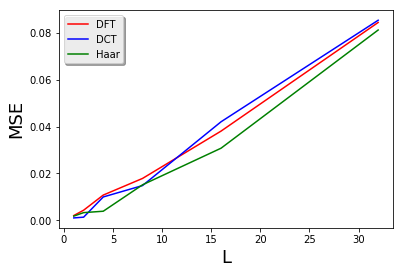

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 29 10:40:43 2018

@author: Shauvik
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math


def meanSquaredError(s1,s2):
    arr = abs((s1-s2))
    sum = 0.0
    for i in range(len(arr)):
        sum = sum + (arr[i]*arr[i])
    sum = sum/np.float(len(arr))
    return sum

def ceil(x):
    integer_part = np.int(x)
    float_part = x - integer_part
    ceil_part = x + (1-float_part)
    return ceil_part

def floor(x):
    return np.int(x)

def DFTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(cmath.exp(complex(0,-(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return X

def IDFTmat(X,N):
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append(cmath.exp(complex(0,(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return x
    
def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append (2*(np.cos((np.pi*k*((2*n)+1))/(2*N))))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return X  
    
def IDCTmat(X,N):
    alpha = []
    for i in range(N):
        if (i==0):
            alpha.append(0.5)
        else:
            alpha.append(1)
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append (alpha[k]*(np.cos((np.pi*k*((2*n)+1))/(2*N))))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return x


def haarMatrix(v):
    if (v == 1):
        return np.array([[1,1],[1,-1]])
    else:
        H_ = haarMatrix(v-1)
        I_ = math.pow(2,(v-1)/2)*np.identity(int(math.pow(2,v-1)))
        H = np.concatenate((np.kron(H_,np.array([1,1])),np.kron(I_,np.array([1,-1]))),axis = 0)
        return H
    return 0

def haarTransform(x,N):
    v = int(math.log(N,2)-1)
    H_N = haarMatrix(v+1)
    print(H_N.shape)
    X_Haar = np.matmul(H_N,x)
    return X_Haar

def inverse_haarTransform(X_Haar,N):
    v = int(math.log(N,2)-1)
    H_N = haarMatrix(v+1)
    H_inv = (1.0/N)*H_N.transpose()
    x_ = np.matmul(H_inv,X_Haar)
    return x_      

N=64
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x1 = []
for i in range(N):
    x1.append(complex(x_real[i],x_img[i]))

print('\nThe dscrete signal is : \n')
print(x1)
    
XDFT = DFTmat(x1,N)
print('\nThe DFT is : \n')
print(XDFT)

xdft = IDFTmat(XDFT,N)
print('\nThe IDFT is : \n')
print(xdft)

XDCT = DCTmat(x1,N)
print('\nThe DCT is : \n')
print(XDCT)

xdct = IDCTmat(XDCT,N)
print('\nThe IDCT is : \n')
print(xdct)

X_Haar = haarTransform(x1,N)
print('\nThe Haar Transform is : \n')
print(X_Haar)

x_haar = inverse_haarTransform(X_Haar,N)
print('\nThe Inverse Haar Transform is : \n')
print(x_haar)

mseDFT = []
mseDCT = []
mseHaar = []
arrL = []

for i in range(6): 
    b = 2**i
    arrL.append(b)
    
    
for i in range(len(arrL)):
    
    XDFT_m = []
    XDCT_m = []
    xdft_m = []
    xdct_m = []
    X_Haar_m = []
    x_haar_m = []
    
    L = arrL[i]
    
    a1 = ((N-1-L)/2)
    a2 = (((N+1-L)/2))
    a3 = (((N-1+L)/2))
    a4 = (((N+1+L)/2))
    a5 = N
    
    
    l1 = np.int(ceil(a1))
    l2 = floor(a2)
    l3 = np.int(ceil(a3))
    l4 = floor(a4)
    l5 = a5
    
    for k in range (l1):
        XDFT_m.append(XDFT[k])
        
    for k in range (l2,l3):
        XDFT_m.append(0)
        
    for k in range (l4,l5):
        XDFT_m.append(XDFT[k])
        
    
    print('\nThe compressed DFT is : \n')
    print(XDFT_m)   

    xdft_m = IDFTmat(XDFT_m,N)
            
    for k in range (N-L):
        XDCT_m.append(XDCT[k])
        
    for k in range (N-L,N):
        XDCT_m.append(0)
        
    print('\nThe compressed DCT is : \n')
    print(XDCT_m)
    
    xdct_m = IDCTmat(XDCT_m,N)
    
    for k in range(N-L):
        X_Haar_m.append(X_Haar[k])
    
    for k in range(N-L,N):
        X_Haar_m.append(0)
    
    print('\nThe compressed Haar Transform is : \n')
    print(XDCT_m)
    
    x_haar_m = inverse_haarTransform(X_Haar_m,N)
       
    mseDFT.append(meanSquaredError(x1,xdft_m))
    mseDCT.append(meanSquaredError(x1,xdct_m))
    mseHaar.append(meanSquaredError(x1,x_haar_m))
    

fig, ax = plt.subplots()
ax.plot(arrL, mseDFT, 'red', label='DFT')
ax.plot(arrL, mseDCT, 'blue', label='DCT')
ax.plot(arrL, mseHaar, 'green', label='Haar')

ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('MSE',fontsize = 18)

legend = ax.legend(loc='upper left', shadow=True)

plt.show()